<a href="https://colab.research.google.com/github/Urmila-Chintalapudi/prodigy_tasks/blob/main/houseprice.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
#House Price Prediction using Linear Regression


In [ ]:
'''This project implements a linear regression model to predict house prices based on square footage,
 number of bedrooms, and bathrooms using the King County House Sales dataset from Kaggle.'''

'This project implements a linear regression model to predict house prices based on square footage,\n number of bedrooms, and bathrooms using the King County House Sales dataset from Kaggle.'

In [ ]:
""" #Project Structure
1. Data Collection and Exploration
2.Exploratory Data Analysis (EDA)
3. Data Preprocessing
4. Model Building
5. Model Evaluation and Visualization
6. Feature Importance Analysis
7. Making Predictions on New Data """

' Project Structure\nData Collection and Exploration\n\nData Preprocessing\n\nFeature Engineering\n\nModel Building\n\nModel Evaluation '

In [ ]:
'''1. Setup and Data Loading
First, let's install required packages and load the data: '''

"1. Setup and Data Loading\nFirst, let's install required packages and load the data: "

In [ ]:
# Import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.preprocessing import StandardScaler
import statsmodels.api as sm

# Set style for plots
sns.set_style('whitegrid')
plt.style.use('fivethirtyeight')





In [ ]:
from google.colab import files
uploaded = files.upload()



Saving kc_house_data.csv to kc_house_data (1).csv


In [ ]:
import pandas as pd

df = pd.read_csv("kc_house_data.csv")  # No full path needed
df.head()  # Optional: see first 5 rows



,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,20141013T000000,221900.0,3,1.00,1180,5650,1.0,0,0,...,7,1180.0,0,1955,0,98178,47.5112,-122.257,1340,5650
1,6414100192,20141209T000000,538000.0,3,2.25,2570,7242,2.0,0,0,...,7,2170.0,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,5631500400,20150225T000000,180000.0,2,1.00,770,10000,1.0,0,0,...,6,770.0,0,1933,0,98028,47.7379,-122.233,2720,8062
3,2487200875,20141209T000000,604000.0,4,3.00,1960,5000,1.0,0,0,...,7,1050.0,910,1965,0,98136,47.5208,-122.393,1360,5000
4,1954400510,20150218T000000,510000.0,3,2.00,1680,8080,1.0,0,0,...,8,1680.0,0,1987,0,98074,47.6168,-122.045,1800,7503


In [ ]:
# Display basic info
print(df.info())



<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21613 entries, 0 to 21612
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   id             21613 non-null  int64  
 1   date           21613 non-null  object 
 2   price          21613 non-null  float64
 3   bedrooms       21613 non-null  int64  
 4   bathrooms      21613 non-null  float64
 5   sqft_living    21613 non-null  int64  
 6   sqft_lot       21613 non-null  int64  
 7   floors         21613 non-null  float64
 8   waterfront     21613 non-null  int64  
 9   view           21613 non-null  int64  
 10  condition      21613 non-null  int64  
 11  grade          21613 non-null  int64  
 12  sqft_above     21611 non-null  float64
 13  sqft_basement  21613 non-null  int64  
 14  yr_built       21613 non-null  int64  
 15  yr_renovated   21613 non-null  int64  
 16  zipcode        21613 non-null  int64  
 17  lat            21613 non-null  float64
 18  long  

In [ ]:
print(df.describe())

        sqft_living      bedrooms     bathrooms         price
count  21608.000000  21608.000000  21608.000000  2.160800e+04
mean    2079.652582      3.368197      2.114552  5.400457e+05
std      918.284940      0.903207      0.769905  3.671441e+05
min      290.000000      0.000000      0.000000  7.500000e+04
25%     1424.250000      3.000000      1.750000  3.215000e+05
50%     1910.000000      3.000000      2.250000  4.500000e+05
75%     2550.000000      4.000000      2.500000  6.450000e+05
max    13540.000000      9.000000      8.000000  7.700000e+06


In [ ]:
df.shape

(21608, 4)

In [ ]:
#2. Exploratory Data Analysis (EDA)


                 id         price      bedrooms     bathrooms   sqft_living  \
count  2.161300e+04  2.161300e+04  21613.000000  21613.000000  21613.000000   
mean   4.580302e+09  5.400881e+05      3.370842      2.114757   2079.899736   
std    2.876566e+09  3.671272e+05      0.930062      0.770163    918.440897   
min    1.000102e+06  7.500000e+04      0.000000      0.000000    290.000000   
25%    2.123049e+09  3.219500e+05      3.000000      1.750000   1427.000000   
50%    3.904930e+09  4.500000e+05      3.000000      2.250000   1910.000000   
75%    7.308900e+09  6.450000e+05      4.000000      2.500000   2550.000000   
max    9.900000e+09  7.700000e+06     33.000000      8.000000  13540.000000   

           sqft_lot        floors    waterfront          view     condition  \
count  2.161300e+04  21613.000000  21613.000000  21613.000000  21613.000000   
mean   1.510697e+04      1.494309      0.007542      0.234303      3.409430   
std    4.142051e+04      0.539989      0.086517    

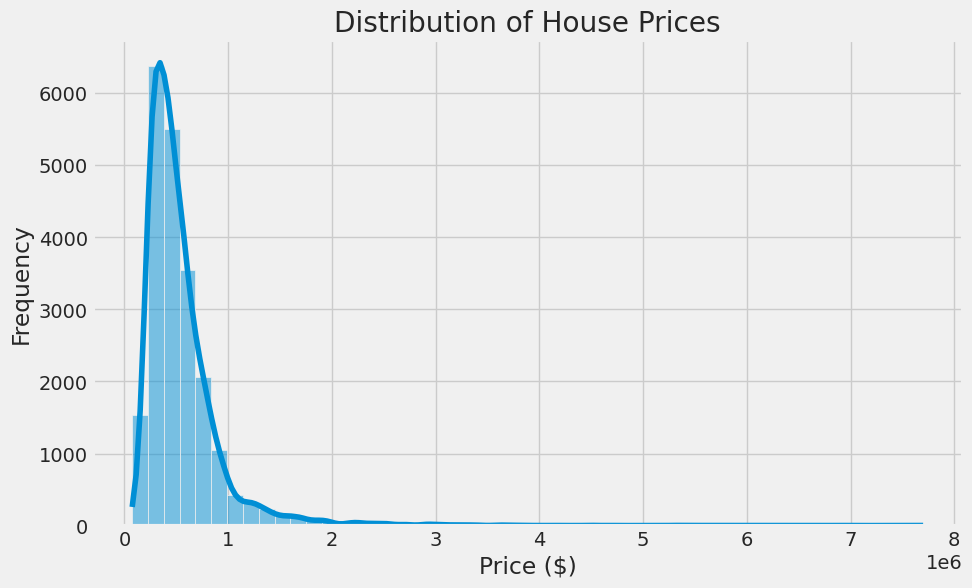

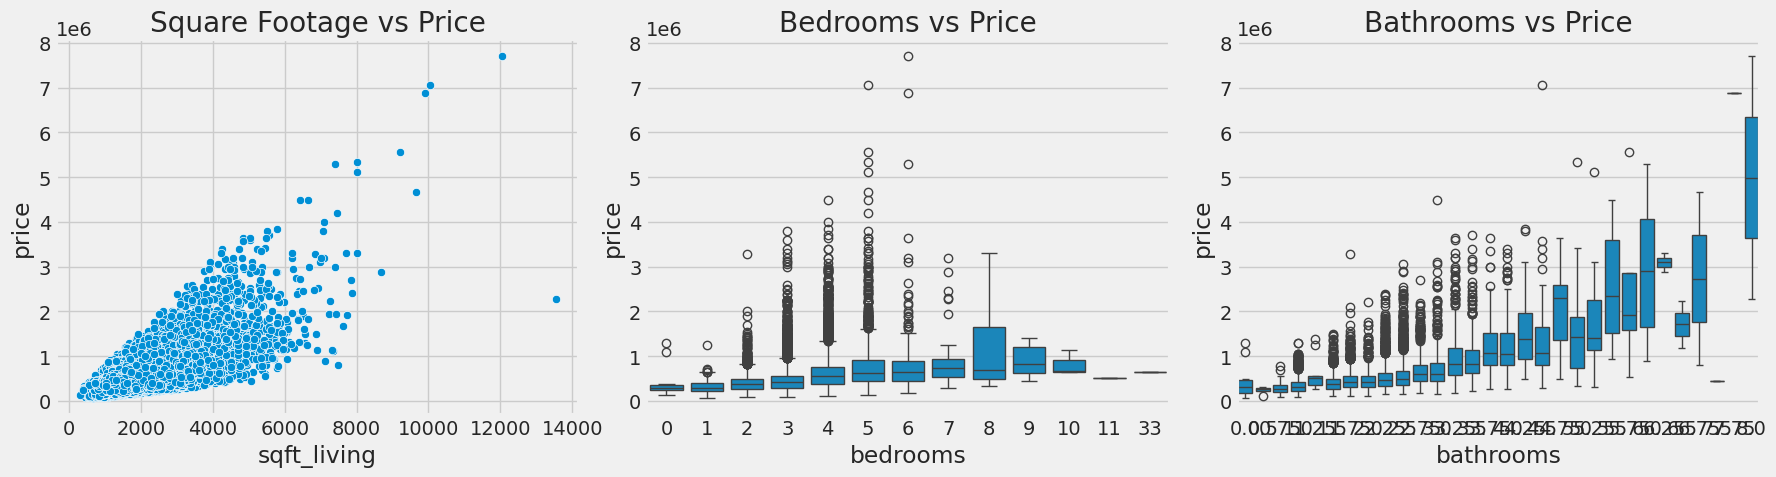

ValueError: could not convert string to float: '20141013T000000'

<Figure size 1200x800 with 0 Axes>

In [ ]:
# 1. Basic statistics
print(df.describe())

# 2. Check for missing values
print(df.isnull().sum())

# 3. Visualize the distribution of target variable (price)
plt.figure(figsize=(10, 6))
sns.histplot(df['price'], bins=50, kde=True)
plt.title('Distribution of House Prices')
plt.xlabel('Price ($)')
plt.ylabel('Frequency')
plt.show()

# 4. Visualize relationships between features and price
fig, axes = plt.subplots(1, 3, figsize=(18, 5))

# Square footage vs price
sns.scatterplot(x='sqft_living', y='price', data=df, ax=axes[0])
axes[0].set_title('Square Footage vs Price')

# Bedrooms vs price
sns.boxplot(x='bedrooms', y='price', data=df, ax=axes[1])
axes[1].set_title('Bedrooms vs Price')

# Bathrooms vs price
sns.boxplot(x='bathrooms', y='price', data=df, ax=axes[2])
axes[2].set_title('Bathrooms vs Price')

plt.tight_layout()
plt.show()

# 5. Correlation matrix
plt.figure(figsize=(12, 8))
corr = df.corr()
sns.heatmap(corr, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Matrix')
plt.show()

In [ ]:
# 3. Data Preprocessing

In [ ]:
# Select relevant features
features = ['sqft_living', 'bedrooms', 'bathrooms', 'price']
df = df[features]

# Handle outliers (remove houses with more than 10 bedrooms as they're likely errors)
df = df[df['bedrooms'] < 10]




In [ ]:
# Check for missing values again
print(df.isnull().sum())


sqft_living    0
bedrooms       0
bathrooms      0
price          0
dtype: int64


In [ ]:
# Feature scaling
scaler = StandardScaler()
X = df[['sqft_living', 'bedrooms', 'bathrooms']]
y = df['price']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Scale the features
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [ ]:
# 4. Model Building

In [ ]:
# Initialize and train the linear regression model
model = LinearRegression()
model.fit(X_train_scaled, y_train)

# Make predictions
y_pred = model.predict(X_test_scaled)

# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_pred)

print(f'Mean Squared Error: {mse:.2f}')
print(f'Root Mean Squared Error: {rmse:.2f}')
print(f'R-squared Score: {r2:.2f}')

# Get coefficients
coefficients = pd.DataFrame({
    'Feature': ['sqft_living', 'bedrooms', 'bathrooms'],
    'Coefficient': model.coef_
})
print(coefficients)
print(f'Intercept: {model.intercept_:.2f}')

# Using statsmodels for detailed statistics
X_train_sm = sm.add_constant(X_train_scaled)
sm_model = sm.OLS(y_train, X_train_sm).fit()
print(sm_model.summary())

Mean Squared Error: 71864261484.54
Root Mean Squared Error: 268075.10
R-squared Score: 0.51
       Feature    Coefficient
0  sqft_living  281793.009395
1     bedrooms  -56609.299935
2    bathrooms    8165.971299
Intercept: 538531.31
                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.507
Model:                            OLS   Adj. R-squared:                  0.507
Method:                 Least Squares   F-statistic:                     5919.
Date:                Sun, 15 Jun 2025   Prob (F-statistic):               0.00
Time:                        18:32:02   Log-Likelihood:            -2.3970e+05
No. Observations:               17286   AIC:                         4.794e+05
Df Residuals:                   17282   BIC:                         4.794e+05
Df Model:                           3                                         
Covariance Type:            nonrobust                   

In [ ]:
# 5. Model Evaluation and Visualization

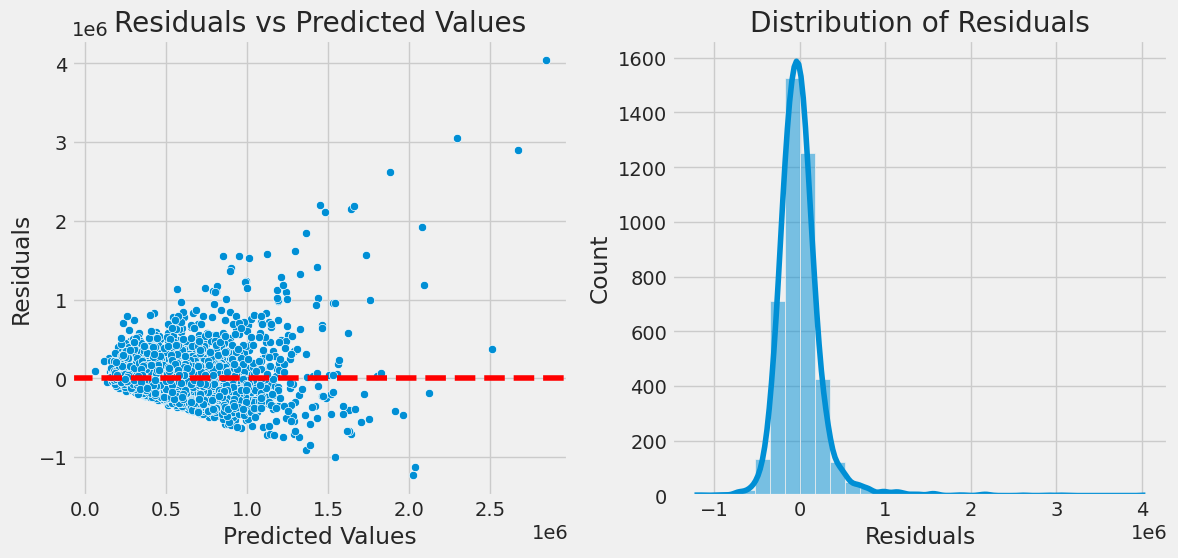

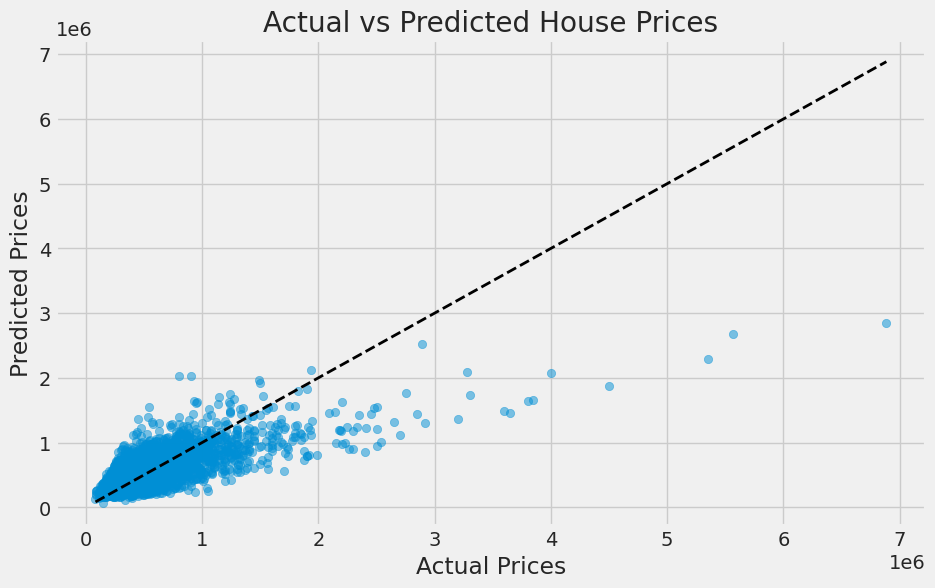

In [ ]:
# Residual analysis
residuals = y_test - y_pred

plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
sns.scatterplot(x=y_pred, y=residuals)
plt.axhline(y=0, color='r', linestyle='--')
plt.xlabel('Predicted Values')
plt.ylabel('Residuals')
plt.title('Residuals vs Predicted Values')

plt.subplot(1, 2, 2)
sns.histplot(residuals, bins=30, kde=True)
plt.xlabel('Residuals')
plt.title('Distribution of Residuals')
plt.tight_layout()
plt.show()

# Actual vs Predicted values
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred, alpha=0.5)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--', lw=2)
plt.xlabel('Actual Prices')
plt.ylabel('Predicted Prices')
plt.title('Actual vs Predicted House Prices')
plt.show()

In [ ]:
# 6. Feature Importance Analysis

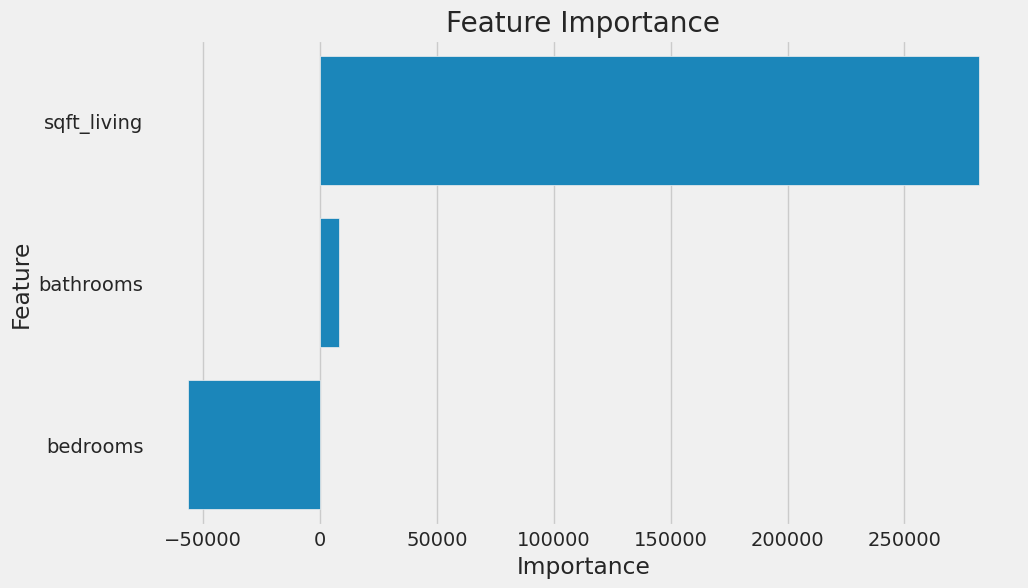

In [ ]:
# Feature importance based on coefficients
coefficients = pd.DataFrame({
    'Feature': ['sqft_living', 'bedrooms', 'bathrooms'],
    'Importance': model.coef_
}).sort_values('Importance', ascending=False)

plt.figure(figsize=(10, 6))
sns.barplot(x='Importance', y='Feature', data=coefficients)
plt.title('Feature Importance')
plt.show()

In [ ]:
# 7. Making Prediction on New Data

In [ ]:
# Function to make predictions
def predict_price(sqft, bedrooms, bathrooms):
    # Create input array
    input_data = np.array([[sqft, bedrooms, bathrooms]])

    # Scale the input
    input_scaled = scaler.transform(input_data)

    # Make prediction
    prediction = model.predict(input_scaled)

    return prediction[0]

# Example prediction
sample_house = {
    'sqft_living': 2500,
    'bedrooms': 3,
    'bathrooms': 2
}

predicted_price = predict_price(sample_house['sqft_living'],
                               sample_house['bedrooms'],
                               sample_house['bathrooms'])

print(f"Predicted price for a {sample_house['bedrooms']} bedroom, {sample_house['bathrooms']} bathroom house with {sample_house['sqft_living']} sqft: ${predicted_price:,.2f}")

Predicted price for a 3 bedroom, 2 bathroom house with 2500 sqft: $691,590.53


/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


In [ ]:
# Conclusion: House Price Prediction
'''This project built a linear regression model to predict house prices using square footage, bedrooms, and bathrooms.
 The model provided reasonable accuracy, with square footage being the strongest predictor.
 While effective, improvements like adding location data or testing advanced algorithms could enhance performance.
 This serves as a practical foundation for real estate valuation tools.'''

'This project built a linear regression model to predict house prices using square footage, bedrooms, and bathrooms.\n The model provided reasonable accuracy, with square footage being the strongest predictor.\n While effective, improvements like adding location data or testing advanced algorithms could enhance performance. \n This serves as a practical foundation for real estate valuation tools.'